In [1]:
# example of loading the generator model and generating images

from numpy import load
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D

from keras.layers import LeakyReLU
from keras.layers import Dropout
from matplotlib import pyplot
import preprocess

# load and prepare training images
def load_real_samples():
    # load the face dataset
    data = load('img_align_celeba.npz')
    X = data['arr_0']
    # convert from unsigned ints to floats
    X = X.astype('float32')
    # scale from [0,255] to [-1,1]
    X = (X - 127.5) / 127.5
    # load labels
    labels = load('img_align_celeba_labels.npz')
    Y = labels['arr_0']
    return X, Y

def generate_real_samples(dataset, n_samples):
    # choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    # retrieve selected images
    X = dataset[ix]

    return X

def define_encoder(dimension):
    model = Sequential(name="sequential_encoder")
    # normal
    model.add(Conv2D(128, (4,4), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 40x40
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 20x30
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 10x10
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample to 5x5
    model.add(Conv2D(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dense(dimension))
    return model

def define_model(generator, encoder):
    model = Sequential()
    generator.trainable = False
    model.add(encoder)
    model.add(generator)
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='mean_squared_error', optimizer=opt)
    return model


def train(model, dataset, n_epochs=50, n_batch=128):
#     bat_per_epo = dataset.shape[0] // n_batch
    # manually enumerate epochs
    for i in range(n_epochs):
        total_loss = 0
        # enumerate batches over the training set
        for data,index in dataset:
            # get randomly selected samples
            inputs = (data-127.5)/255
            loss = model.train_on_batch(inputs, inputs)
            total_loss+=loss
            print(i+1,loss)
        print(i+1, total_loss)
    return

In [2]:
# load model
batch_size = 128
generator = load_model('generator_model_2.h5')
dataset = preprocess.load_images(batch_size = batch_size)
encoder = define_encoder(200)
model = define_model(generator, encoder)

Found 202599 files belonging to 4 classes.


In [76]:
train(model,dataset, n_batch = batch_size)
model.layers[0].save('encoder_model_2.h5')

1 0.012629473581910133
1 0.015298748388886452
1 0.012744549661874771
1 0.013152485713362694
1 0.013354754075407982
1 0.013441141694784164
1 0.012088450603187084
1 0.012576520442962646
1 0.012522395700216293
1 0.012307959608733654
1 0.012288105674088001
1 0.011712445877492428
1 0.011784635484218597
1 0.012559451162815094
1 0.012305975891649723
1 0.01252478826791048
1 0.01266033761203289
1 0.012006524950265884
1 0.011588117107748985
1 0.012232065200805664
1 0.011744321323931217
1 0.012476286850869656
1 0.012316860258579254
1 0.01237479131668806
1 0.012042036280035973
1 0.012913641519844532
1 0.012874225154519081
1 0.012856095097959042
1 0.011869438923895359
1 0.012245156802237034
1 0.012398868799209595
1 0.011762572452425957
1 0.012354595586657524
1 0.012682612054049969
1 0.01258096657693386
1 0.012692141346633434
1 0.012692094780504704
1 0.01279603224247694
1 0.012475742027163506
1 0.01130941603332758
1 0.012549413368105888
1 0.012115594930946827
1 0.012223776429891586
1 0.0120883826166

1 0.015410342253744602
1 0.016060147434473038
1 0.01673022098839283
1 0.01811734028160572
1 0.015253015793859959
1 0.015761174261569977
1 0.015395552851259708
1 0.017230797559022903
1 0.016021521762013435
1 0.015954380854964256
1 0.014685154892504215
1 0.01590464450418949
1 0.014738362282514572
1 0.013316793367266655
1 0.013747354969382286
1 0.014366683550179005
1 0.014619196765124798
1 0.01377770584076643
1 0.014608395285904408
1 0.015584115870296955
1 0.015233994461596012
1 0.015729917213320732
1 0.014943402260541916
1 0.013727257028222084
1 0.014289290644228458
1 0.014597050845623016
1 0.014917715452611446
1 0.01376933790743351
1 0.014858304522931576
1 0.014445492997765541
1 0.014683804474771023
1 0.013835173100233078
1 0.014507689513266087
1 0.014178241603076458
1 0.0136342141777277
1 0.013669551350176334
1 0.013853082433342934
1 0.014250261709094048
1 0.013868637382984161
1 0.013953153043985367
1 0.013619753532111645
1 0.014269344508647919
1 0.013982211239635944
1 0.01357143837958

1 0.01219095941632986
1 0.012521716766059399
1 0.013258922845125198
1 0.0126063022762537
1 0.01263546571135521
1 0.012288695201277733
1 0.012851429171860218
1 0.012455753050744534
1 0.01348041370511055
1 0.011921728029847145
1 0.013170529156923294
1 0.011988787911832333
1 0.012468750588595867
1 0.012053020298480988
1 0.013115160167217255
1 0.01195597555488348
1 0.012580548413097858
1 0.012421228922903538
1 0.012650679796934128
1 0.012431928887963295
1 0.012697991915047169
1 0.012151382863521576
1 0.013064634054899216
1 0.012518093921244144
1 0.012476040050387383
1 0.012340765446424484
1 0.011619696393609047
1 0.011762486770749092
1 0.012529928237199783
1 0.012212318368256092
1 0.012565739452838898
1 0.012079350650310516
1 0.012210397981107235
1 0.012386410497128963
1 0.012196945026516914
1 0.012879417277872562
1 0.01255402248352766
1 0.012767020612955093
1 0.012808321975171566
1 0.012371704913675785
1 0.012429562397301197
1 0.01283235289156437
1 0.011858955956995487
1 0.012186756357550

1 0.011681362055242062
1 0.01220732368528843
1 0.012515592388808727
1 0.012499737553298473
1 0.012169130146503448
1 0.011719762347638607
1 0.012704173102974892
1 0.012890109792351723
1 0.012572760693728924
1 0.011988626793026924
1 0.012068934738636017
1 0.012270074337720871
1 0.012301573529839516
1 0.012141447514295578
1 0.0120231369510293
1 0.012605573050677776
1 0.012925665825605392
1 0.013243775814771652
1 0.011625604704022408
1 0.012650784105062485
1 0.011932062916457653
1 0.012228889390826225
1 0.011827333830296993
1 0.012882333248853683
1 0.012284544296562672
1 0.012742596678435802
1 0.013006972149014473
1 0.011772283352911472
1 0.01302329171448946
1 0.013065511360764503
1 0.01283133402466774
1 0.011879729107022285
1 0.012869617901742458
1 0.012000841088593006
1 0.01283672358840704
1 0.011685800738632679
1 0.012145386077463627
1 0.011828111484646797
1 0.012491626664996147
1 0.012377874925732613
1 0.01158259715884924
1 0.013366062194108963
1 0.011651188135147095
1 0.01206077821552

1 0.011831998825073242
1 0.011922618374228477
1 0.012676878832280636
1 0.011790215037763119
1 0.013526421040296555
1 0.012219319120049477
1 0.012589010410010815
1 0.012142700143158436
1 0.012423529289662838
1 0.012621160596609116
1 0.012579627335071564
1 0.012393026612699032
1 0.01262911781668663
1 0.012296038679778576
1 0.012655661441385746
1 0.013558618724346161
1 0.012743263505399227
1 0.01309955958276987
1 0.011769852600991726
1 0.013059413060545921
1 0.012368607334792614
1 0.012347319163382053
1 0.011643639765679836
1 0.012587609700858593
1 0.012003079988062382
1 0.011939799413084984
1 0.012557469308376312
1 0.012141556479036808
1 0.012071238830685616
1 0.012496518902480602
1 0.013230948708951473
1 0.012802931480109692
1 0.011766556650400162
1 0.012355689890682697
1 0.01331610418856144
1 0.011918209493160248
1 0.012490639463067055
1 0.012274051085114479
1 0.011916909366846085
1 0.01326043251901865
1 0.012655862607061863
1 0.012795072048902512
1 0.012662665918469429
1 0.01300218794

2 0.012616991065442562
2 0.0120181143283844
2 0.012445743195712566
2 0.012401260435581207
2 0.012563545256853104
2 0.01221784483641386
2 0.01176043227314949
2 0.011809077113866806
2 0.012326827272772789
2 0.013199370354413986
2 0.012512259185314178
2 0.011881261132657528
2 0.012898879125714302
2 0.012407008558511734
2 0.01223998423665762
2 0.0128932548686862
2 0.01251424290239811
2 0.012650326825678349
2 0.012639624997973442
2 0.011567341163754463
2 0.011997368186712265
2 0.011770989745855331
2 0.012602413073182106
2 0.012674890458583832
2 0.01264038123190403
2 0.012388359755277634
2 0.011663109064102173
2 0.01203954964876175
2 0.012126956135034561
2 0.0132227074354887
2 0.012286262586712837
2 0.012966398149728775
2 0.012632962316274643
2 0.011559773236513138
2 0.01245877705514431
2 0.013009488582611084
2 0.012295582331717014
2 0.012166738510131836
2 0.012365171685814857
2 0.012899123132228851
2 0.012571578845381737
2 0.012148487381637096
2 0.012121759355068207
2 0.012447107583284378
2

2 0.012986286543309689
2 0.014069494791328907
2 0.012480982579290867
2 0.012561369687318802
2 0.012261774390935898
2 0.012829241342842579
2 0.01141594909131527
2 0.013672390021383762
2 0.012525869533419609
2 0.011935017071664333
2 0.011953389272093773
2 0.011220689862966537
2 0.01201267447322607
2 0.012581774033606052
2 0.012886795215308666
2 0.011900263838469982
2 0.012005150318145752
2 0.011784099042415619
2 0.011848445050418377
2 0.01216279249638319
2 0.012643308378756046
2 0.012048402801156044
2 0.01190395001322031
2 0.012929044663906097
2 0.011873684823513031
2 0.011125970631837845
2 0.011577515862882137
2 0.011434661224484444
2 0.01232999935746193
2 0.012016654945909977
2 0.01186187844723463
2 0.01139973197132349
2 0.01218955498188734
2 0.012342040427029133
2 0.011345802806317806
2 0.01291082426905632
2 0.01259657833725214
2 0.012403499335050583
2 0.0117315873503685
2 0.01295065600425005
2 0.011783883906900883
2 0.011575603857636452
2 0.012566307559609413
2 0.012791606597602367
2

2 0.012933892197906971
2 0.013555957935750484
2 0.012824300676584244
2 0.012728767469525337
2 0.012753362767398357
2 0.013018760830163956
2 0.01185368187725544
2 0.013112750835716724
2 0.011891411617398262
2 0.01181800477206707
2 0.011602070182561874
2 0.012644963338971138
2 0.01233573816716671
2 0.01294463500380516
2 0.011671367101371288
2 0.01217544823884964
2 0.01279579009860754
2 0.01370264869183302
2 0.013424720615148544
2 0.013194059021770954
2 0.012853406369686127
2 0.011766570620238781
2 0.013053896836936474
2 0.012480833567678928
2 0.012486857362091541
2 0.012717667035758495
2 0.012172476388514042
2 0.013403073884546757
2 0.012377649545669556
2 0.01184594351798296
2 0.01205781102180481
2 0.012414888478815556
2 0.012097747065126896
2 0.012908960692584515
2 0.013380130752921104
2 0.011564054526388645
2 0.012337695807218552
2 0.012269868515431881
2 0.011238008737564087
2 0.012879904359579086
2 0.01252827513962984
2 0.011495338752865791
2 0.01247404795140028
2 0.012477614916861057

2 0.012839807197451591
2 0.011968212202191353
2 0.0113397017121315
2 0.011538885533809662
2 0.013344252482056618
2 0.01262611523270607
2 0.013024731539189816
2 0.012293551117181778
2 0.012758387252688408
2 0.012120585888624191
2 0.01119411364197731
2 0.011775093153119087
2 0.012252195738255978
2 0.011969739571213722
2 0.012362628243863583
2 0.01298081036657095
2 0.011863581836223602
2 0.012577059678733349
2 0.01151504646986723
2 0.011768050491809845
2 0.011503965593874454
2 0.012476427480578423
2 0.01341197732836008
2 0.014675097540020943
2 0.013787664473056793
2 0.014346105977892876
2 0.01246754452586174
2 0.012718494981527328
2 0.012350098229944706
2 0.012990432791411877
2 0.011861964128911495
2 0.012753481045365334
2 0.012295926921069622
2 0.012699720449745655
2 0.011934692971408367
2 0.01189457532018423
2 0.011930298991501331
2 0.012772506102919579
2 0.01282411441206932
2 0.014285090379416943
2 0.012813244014978409
2 0.012373431585729122
2 0.013920806348323822
2 0.01307977456599474

3 0.01191433984786272
3 0.013005864806473255
3 0.013944882899522781
3 0.01395141240209341
3 0.012956353835761547
3 0.012532255612313747
3 0.012437829747796059
3 0.012418899685144424
3 0.012725317850708961
3 0.012385220266878605
3 0.01262653712183237
3 0.011887404136359692
3 0.012594949454069138
3 0.012951096519827843
3 0.012965795584022999
3 0.013531781733036041
3 0.012886817567050457
3 0.012878583744168282
3 0.012951875105500221
3 0.012395846657454967
3 0.011116785928606987
3 0.011873691342771053
3 0.012149853631854057
3 0.01201188936829567
3 0.011848659254610538
3 0.01260472647845745
3 0.012313760817050934
3 0.01177182700484991
3 0.012341631576418877
3 0.012259033508598804
3 0.01190822385251522
3 0.012072059325873852
3 0.01241420116275549
3 0.01255771890282631
3 0.011824219487607479
3 0.011805317364633083
3 0.012408957816660404
3 0.012913746759295464
3 0.012202298268675804
3 0.011968803592026234
3 0.01089639775454998
3 0.011448830366134644
3 0.012103336863219738
3 0.01298354193568229

3 0.012093530036509037
3 0.011973516084253788
3 0.013421927578747272
3 0.0131686357781291
3 0.013392039574682713
3 0.01252518780529499
3 0.012623660266399384
3 0.01231223065406084
3 0.011921738274395466
3 0.011833484284579754
3 0.012966611422598362
3 0.012785036116838455
3 0.01199173554778099
3 0.011877883225679398
3 0.011926445178687572
3 0.012606598436832428
3 0.012507605366408825
3 0.013085143640637398
3 0.012630680575966835
3 0.012836447916924953
3 0.011709732934832573
3 0.012216749601066113
3 0.012782820500433445
3 0.012468620203435421
3 0.011560590006411076
3 0.0128962816670537
3 0.013344944454729557
3 0.012713865377008915
3 0.012296414002776146
3 0.012503164820373058
3 0.011773432604968548
3 0.011608396656811237
3 0.011598359793424606
3 0.012110702693462372
3 0.012774557806551456
3 0.011873641982674599
3 0.012567728757858276
3 0.011843481101095676
3 0.012296334840357304
3 0.012420632876455784
3 0.0123753622174263
3 0.012618012726306915
3 0.013720640912652016
3 0.0134247336536645

3 0.01224458310753107
3 0.011983538046479225
3 0.012166798114776611
3 0.011134658940136433
3 0.011973151005804539
3 0.01215918269008398
3 0.01160354819148779
3 0.01230933703482151
3 0.011669487692415714
3 0.012639831751585007
3 0.011957411654293537
3 0.012086732313036919
3 0.011630930937826633
3 0.012615480460226536
3 0.011761851608753204
3 0.011873345822095871
3 0.012884064577519894
3 0.012113107368350029
3 0.011554336175322533
3 0.012842015363276005
3 0.012579125352203846
3 0.012424280866980553
3 0.012463323771953583
3 0.011376667767763138
3 0.013252654112875462
3 0.01296379417181015
3 0.011945759877562523
3 0.011264217086136341
3 0.012482699006795883
3 0.011980440467596054
3 0.011782380752265453
3 0.012403737753629684
3 0.012192483060061932
3 0.012466208077967167
3 0.012485138140618801
3 0.012209258042275906
3 0.01263685803860426
3 0.013153641484677792
3 0.013174807652831078
3 0.013294152915477753
3 0.01340438798069954
3 0.012667976319789886
3 0.013202356174588203
3 0.01195167191326

KeyboardInterrupt: 

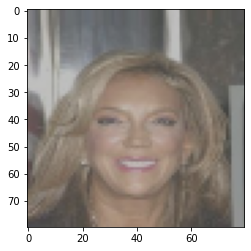

In [127]:
for data,index in dataset:
    inputs = (data-127.5)/255
    pyplot.imshow((inputs+1)[0]/2)
    example = (model.predict(inputs)+1)/2
    break
    

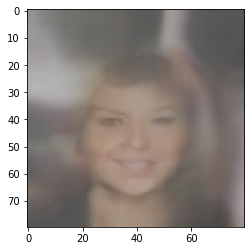

In [128]:
pyplot.imshow(example[0])